In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train_income.csv')
test_df = pd.read_csv('test_income.csv')

### Understand the type of data

In [3]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
print('shape of train_df is', train_df.shape)
print(train_df.dtypes.value_counts())

shape of train_df is (9557, 143)
int64      130
float64      8
object       5
dtype: int64


In [5]:
test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
print('shape of test_df is', test_df.shape)
print(test_df.dtypes.value_counts())

shape of test_df is (23856, 142)
int64      129
float64      8
object       5
dtype: int64


### Identify the output variable

In [7]:
for column in train_df:
    if column not in test_df:
        print('The output variable is', column)

The output variable is Target


In [8]:
print(train_df['Target'].value_counts())

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


#### More detail about the type of the dataset

In [12]:
#### Detail of object datatype columns so we can do an appropriate approach to them

#### Object dt: 
#### Id:Unique ID
#### idhogar: Household level identifier
#### dependency, Dependency rate, calculated = (number of members of the household
        #### younger than 19 or older than 64)/(number of member of household between 19 and 64)
#### edjefe: years of education of male head of household, based on the interaction of
        #### escolari (years of education), head of household and gender, yes=1 and no=0
#### edjefa: years of education of female head of household, based on the interaction of
        #### escolari (years of education), head of household and gender, yes=1 and no=0

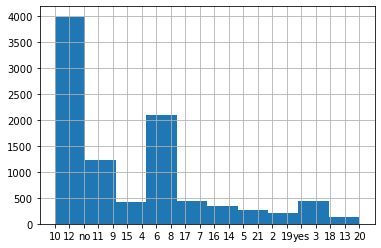

In [17]:
train_df['edjefe'].hist()

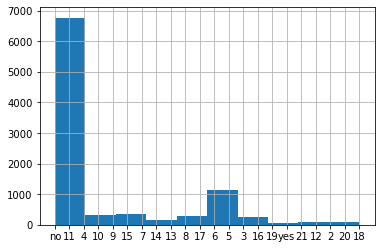

In [18]:
train_df['edjefa'].hist()

In [19]:
# mapping yes=1 and no=0 to other remaining object columns
def obj(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x 

for df in [train_df, test_df]:
    df['dependency'] = df['dependency'].apply(obj).astype(np.float64)
    df['edjefe'] = df['edjefe'].apply(obj).astype(np.float64)
    df['edjefa'] = df['edjefa'].apply(obj).astype(np.float64)

In [20]:
# before apply function
train_df[['dependency', 'edjefe', 'edjefa']].head()

,dependency,edjefe,edjefa
0,0.0,10.0,0.0
1,8.0,12.0,0.0
2,8.0,0.0,11.0
3,1.0,11.0,0.0
4,1.0,11.0,0.0


In [21]:
# after apply function
train_df[['dependency', 'edjefe', 'edjefa']].head()

,dependency,edjefe,edjefa
0,0.0,10.0,0.0
1,8.0,12.0,0.0
2,8.0,0.0,11.0
3,1.0,11.0,0.0
4,1.0,11.0,0.0


### Count how many null values are existing in columns

#### train dataset

In [22]:
null_int = train_df.select_dtypes('int64').isnull().sum()
null_int[null_int>0]

Series([], dtype: int64)

In [23]:
null_float = train_df.select_dtypes('float64').isnull().sum()
null_float

v2a1               6860
v18q1              7342
rez_esc            7928
dependency            0
edjefe                0
edjefa                0
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

In [24]:
train_df[['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']].head()

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
0,190000.0,NaN,NaN,10.0,100.0
1,135000.0,1.0,NaN,12.0,144.0
2,NaN,NaN,NaN,11.0,121.0
3,180000.0,1.0,1.0,11.0,121.0
4,180000.0,1.0,NaN,11.0,121.0


In [25]:
null_object = train_df.select_dtypes('object').isnull().sum()
null_object

Id         0
idhogar    0
dtype: int64

In [26]:
# v2a1: Monthly rent payment
# v18q1: number of tablets household owns
# rez_esc: Years behind in school
# meaneduc: average years of education for adults (18+)
# SQBmeaned: square of the mean years of education of adults (>=18) in the household

In [27]:
zero_mpayment = train_df.loc[train_df['v2a1'].isnull(), ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']]
zero_mpayment.head()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


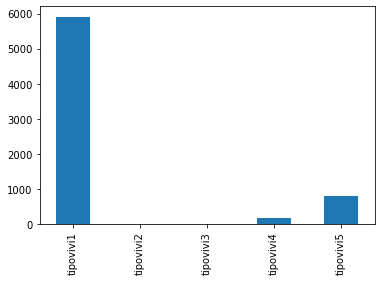

In [28]:
zero_mpayment.sum().plot.bar()

#### test dataset

In [29]:
null_int2 = test_df.select_dtypes('int64').isnull().sum()
null_int2[null_int2>0]

Series([], dtype: int64)

In [30]:
null_float2 = test_df.select_dtypes('float64').isnull().sum()
null_float2

v2a1               17403
v18q1              18126
rez_esc            19653
dependency             0
edjefe                 0
edjefa                 0
meaneduc              31
overcrowding           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
dtype: int64

In [31]:
null_object2 = test_df.select_dtypes('object').isnull().sum()
null_object2

Id         0
idhogar    0
dtype: int64

In [32]:
# no null vale for int and object datatype, plenty for float datatype

In [33]:
zero_tpayment = test_df.loc[test_df['v2a1'].isnull(), ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']]
zero_tpayment.head()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
9,1,0,0,0,0


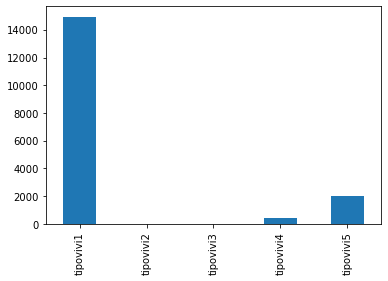

In [34]:
zero_tpayment.sum().plot.bar()

In [35]:
# majority household whose zero monthly payment for both training and testing dataset is from tipovivi1 
# which is own and paid fully, the second is tipovivi5 which is assigned or borrowed. 
# So, it makes sense to fill null values with 0.

### Remove null value rows of the target variable

In [36]:
train_df['Target'].isnull().sum()

0

#### There is no null value in target variable

#### for v2a1 column

In [37]:
for df in [train_df, test_df]:
    df['v2a1'].fillna(0, inplace=True)

print(train_df['v2a1'].isnull().sum())
print(test_df['v2a1'].isnull().sum())

0
0


#### for v18q1 column

#### training and testing dataset

In [38]:
for df in [train_df, test_df]:
    print(df['v18q1'].unique())
    print(df['v18q1'].isnull().value_counts())

[nan  1.  2.  3.  4.  5.  6.]
True     7342
False    2215
Name: v18q1, dtype: int64
[nan  1.  2.  3.  4.  5.  6.]
True     18126
False     5730
Name: v18q1, dtype: int64


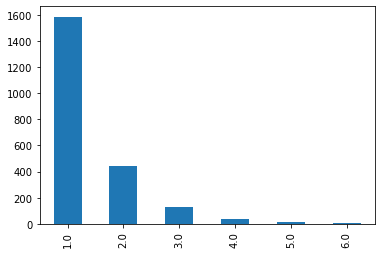

In [39]:
train_df['v18q1'].value_counts().plot.bar()

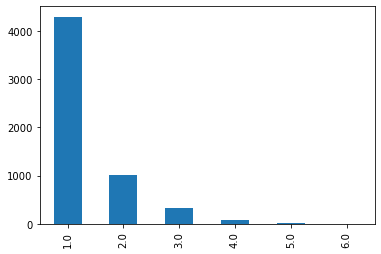

In [40]:
test_df['v18q1'].value_counts().plot.bar()

In [41]:
# since it is ownersip of tablet, we can assume that null value means that house doesn't own a tablet
# so we can replace null with 0
for df in [train_df, test_df]:
    df['v18q1'].fillna(0, inplace=True)

print(train_df['v18q1'].isnull().sum())
print(test_df['v18q1'].isnull().sum())

0
0


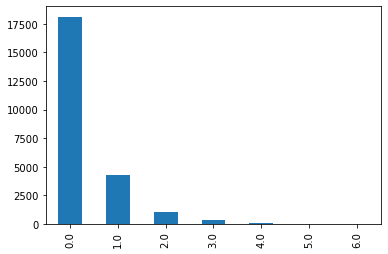

In [42]:
test_df['v18q1'].value_counts().plot.bar()

#### for rez_esc column

In [43]:
# rez_esc: Years behind in school
for df in [train_df, test_df]:
    print(df['rez_esc'].unique())
    print(df['rez_esc'].isnull().value_counts())

[nan  1.  0.  3.  2.  4.  5.]
True     7928
False    1629
Name: rez_esc, dtype: int64
[nan  0.  3.  2.  1.  4.  5. 99.]
True     19653
False     4203
Name: rez_esc, dtype: int64


In [44]:
zero_reztr = train_df.loc[(train_df['rez_esc'].isnull() & ((train_df['age']>7) & (train_df['age']<17)))]
zero_reztr.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


In [45]:
zero_reztr['age']

2514    10
Name: age, dtype: int64

In [46]:
zero_rezts = test_df.loc[(test_df['rez_esc'].isnull() & ((test_df['age']>7) & (test_df['age']<17)))]
zero_rezts.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
1520,ID_4a6a8bea3,0.0,1,4,1,1,1,0,0.0,0,...,10,0,100,81,0,16,20.250000,1.5625,144.00000,100
11869,ID_246d573ff,117000.0,0,5,0,1,1,1,1.0,0,...,15,0,225,36,36,9,4.000000,1.0000,177.77777,225
13450,ID_91ff26486,150000.0,0,5,0,1,1,1,1.0,2,...,9,0,81,16,81,4,1.777778,1.0000,110.25000,81


In [47]:
zero_rezts['age']

1520     10
11869    15
13450     9
Name: age, dtype: int64

In [48]:
# only one row in training and three rows in testing dataset where age between 7 and 17 that been years in school, so we can 
# assume that the other null value is 0
for df in [train_df, test_df]:
    df['rez_esc'].fillna(0, inplace=True)

print(train_df['rez_esc'].isnull().sum())
print(test_df['rez_esc'].isnull().sum())

0
0


#### for meaneduc column

In [49]:
# meaneduc: average years of education for adults (18+)
for df in [train_df, test_df]:
    print(df['meaneduc'].isnull().value_counts())

False    9552
True        5
Name: meaneduc, dtype: int64
False    23825
True        31
Name: meaneduc, dtype: int64


In [50]:
zero_edutr = train_df.loc[train_df['meaneduc'].isnull(), ['edjefe', 'edjefa', 'instlevel1', 'instlevel2', 'instlevel3']]
print(zero_edutr.head())
print(zero_edutr.shape)

      edjefe  edjefa  instlevel1  instlevel2  instlevel3
1291     0.0    10.0           0           0           0
1840     4.0     0.0           0           0           1
1841     4.0     0.0           0           1           0
2049    12.0     0.0           0           0           0
2050    12.0     0.0           0           0           0
(5, 5)


In [51]:
zero_eduts = test_df.loc[test_df['meaneduc'].isnull(), ['edjefe', 'edjefa', 'instlevel1', 'instlevel2', 'instlevel3']]
print(zero_eduts)
print(zero_eduts.shape)

       edjefe  edjefa  instlevel1  instlevel2  instlevel3
4         0.0    11.0           0           0           0
535       0.0    11.0           0           0           0
536       0.0    12.0           0           0           0
537       0.0    12.0           0           0           0
2612      8.0     0.0           0           0           0
2613      8.0     0.0           0           0           1
6809      0.0    12.0           0           0           0
6810      0.0    12.0           0           0           0
7266     12.0     0.0           0           0           0
7267     12.0     0.0           0           0           0
15808     6.0     0.0           0           0           1
15809     6.0     0.0           0           0           0
15810     6.0     0.0           1           0           0
16096     0.0     7.0           1           0           0
16097     0.0     7.0           0           0           0
16291     9.0     0.0           0           0           0
19421     0.0 

In [52]:
# meaneduc is null mostly if all those columns above is zero, hence we will replace null with 0
for df in [train_df, test_df]:
    df['meaneduc'].fillna(0, inplace=True)

print(train_df['meaneduc'].isnull().sum())
print(test_df['meaneduc'].isnull().sum())

0
0


#### for SQBmeaned column

In [53]:
# SQBmeaned: square of the mean years of education of adults (>=18) in the household
zero_sqbt = train_df.loc[train_df['SQBmeaned'].isnull(), ['edjefe', 'edjefa', 'instlevel1', 'instlevel2', 'instlevel3']]
print(zero_sqbt)
print(zero_sqbt.shape)

      edjefe  edjefa  instlevel1  instlevel2  instlevel3
1291     0.0    10.0           0           0           0
1840     4.0     0.0           0           0           1
1841     4.0     0.0           0           1           0
2049    12.0     0.0           0           0           0
2050    12.0     0.0           0           0           0
(5, 5)


In [54]:
# it is same as meaneduc treatment
for df in [train_df, test_df]:
    df['SQBmeaned'].fillna(0, inplace=True)

print(train_df['SQBmeaned'].isnull().sum())
print(test_df['SQBmeaned'].isnull().sum())

0
0


#### Check the overall data for null value after treatment

In [55]:
null_float = train_df.select_dtypes('float64').isnull().sum()
null_float

v2a1               0
v18q1              0
rez_esc            0
dependency         0
edjefe             0
edjefa             0
meaneduc           0
overcrowding       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
dtype: int64

In [56]:
null_float2 = test_df.select_dtypes('float64').isnull().sum()
null_float2

v2a1               0
v18q1              0
rez_esc            0
dependency         0
edjefe             0
edjefa             0
meaneduc           0
overcrowding       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
dtype: int64

In [57]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### Check whether all members of the house have the same poverty level

### Check if there is a house without a family head

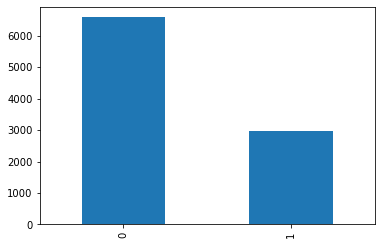

In [58]:
train_df['parentesco1'].value_counts().plot.bar()

In [59]:
fam_headtr = train_df.groupby('idhogar')['parentesco1'].sum()
fam_headtr

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [60]:
fam_headtr.value_counts()

1    2973
0      15
Name: parentesco1, dtype: int64

In [61]:
zero_headtr = train_df.loc[train_df['idhogar'].isin(fam_headtr[fam_headtr==0].index), :]
zero_headtr                             

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
4935,ID_717302050,0.0,0,8,0,1,1,0,0.0,0,...,36,1156,16,36,4,0.640000,1.000000,36.000000,1156,3
4975,ID_ff6f13458,0.0,0,4,0,1,1,0,0.0,1,...,81,256,16,81,4,4.000000,1.000000,56.250000,256,3
5391,ID_64c9eabac,0.0,0,5,0,1,1,0,0.0,0,...,196,400,9,36,0,1.000000,0.000000,75.111115,400,3
5396,ID_8948b1f91,90000.0,0,5,0,1,1,0,0.0,2,...,9,100,25,36,9,2.777778,2.250000,72.250000,100,3
6443,ID_8ddb34d2c,0.0,0,3,0,1,1,0,0.0,1,...,0,49,16,9,4,4.000000,1.000000,36.000000,49,3
6444,ID_03e2f23b0,0.0,0,3,0,1,1,0,0.0,1,...,36,169,16,9,4,4.000000,1.000000,36.000000,169,3
7086,ID_ba2ac56bb,0.0,0,4,0,1,1,0,0.0,0,...,121,361,25,256,9,6.250000,2.250000,324.000000,361,3
7438,ID_7ba374a80,0.0,0,4,0,1,1,0,0.0,0,...,36,1849,16,0,1,4.000000,0.111111,32.111111,1849,4
7439,ID_1bca5b5e5,0.0,0,4,0,1,1,0,0.0,0,...,16,196,16,0,1,4.000000,0.111111,32.111111,196,4
7440,ID_622be4200,0.0,0,4,0,1,1,0,0.0,0,...,25,1024,16,0,1,4.000000,0.111111,32.111111,1024,4


In [62]:
fam_headts = test_df.groupby('idhogar')['parentesco1'].sum()
fam_headts

idhogar
000a08204    1
000bce7c4    1
001845fb0    1
003b51a87    1
003bf2fa9    1
            ..
ffb6d4688    1
ffc1c5fb1    1
ffcdf41de    1
fff6d7a90    1
fffbede04    1
Name: parentesco1, Length: 7352, dtype: int64

In [63]:
fam_headts.value_counts()

1    7334
0      18
Name: parentesco1, dtype: int64

#### there are 15 households in training dataset and 18 households in testing dataset without a family head

### Set poverty level of the members and the head of the house within a family

In [64]:
# find all household with monthly payment is greater than 0
poverty = train_df[train_df['v2a1']!=0]

#find the standard payment for household based on their area
poverty_standard = poverty.groupby('area1')['v2a1'].apply(np.median)

poverty_standard

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

In [65]:
# In rural area, if payment is below 80000, then it is below poverty level
# In urban area, if payment is below 140000, then it is below poverty level

In [66]:
def pov(x):
    if x < 80000:
        return('Rural and Urban: Below poverty level')
    elif x > 140000:
        return('Rural and Urban: Above poverty level')
    elif x < 140000:
        return('Rural: Above poverty level; Urban: Below poverty level')

In [67]:
poverty_level = poverty['v2a1'].apply(pov)

In [68]:
pd.crosstab(poverty_level, poverty['area1'])

area1,0,1
v2a1,,
Rural and Urban: Above poverty level,139,1103
Rural and Urban: Below poverty level,208,418
Rural: Above poverty level; Urban: Below poverty level,98,663


In [69]:
# Interpretation:
# For rural area: 208 families are below poverty level and 237 are above poverty level
# For urban area: 1081 families are below poverty level and 1103 are above poverty level

### Check if there are any biases in your dataset

In [70]:
train_df.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

([<matplotlib.axis.XTick at 0x23fb31239d0>,
 [Text(0, 0, 'extreme poverty'),
  Text(0, 0, 'moderate poverty'),
  Text(0, 0, 'vurnerable poverty'),
  Text(0, 0, 'non-vurnerable poverty')])

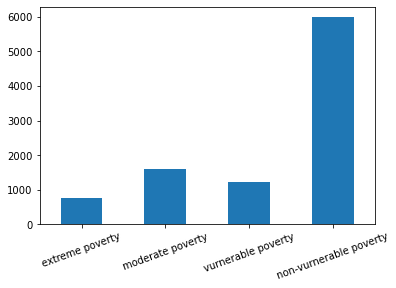

In [71]:
train_df.Target.value_counts().sort_index().plot.bar()
plt. xticks([0,1,2,3], ['extreme poverty', 'moderate poverty', 'vurnerable poverty', 'non-vurnerable poverty'], 
            rotation=20)

#### There is bias in dataset

### Remove redundant columns

In [72]:
# After read the column description of the dataset, we can remove several columns that actually can be presented by another columns

cols = ['Id', 'idhogar', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 
        'SQBdependency', 'SQBmeaned', 'agesq', 'area2', 'female', 'tamhog', 'hogar_total', 'r4t3']

for df in [train_df, test_df]:
    df.drop(columns = cols,inplace=True)

### Predict the accuracy using random forest classifier

In [73]:
print(train_df.shape)
print(test_df.shape)

(9557, 127)
(23856, 126)


In [74]:
y_traindf = train_df['Target']
X_traindf  = train_df.drop(['Target'], 1)
X_traindf.shape

(9557, 126)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_traindf, y_traindf, test_size=0.2, random_state=123)

In [77]:
rfclassifier = RandomForestClassifier()

In [78]:
rfclassifier.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
y_train_predict = rfclassifier.predict(X_test)

In [80]:
accuracy_score(y_test, y_train_predict)

0.9246861924686193

In [81]:
confusion_matrix(y_test, y_train_predict)

array([[ 117,   13,    0,   21],
       [   5,  276,    7,   23],
       [   0,   15,  170,   58],
       [   0,    0,    2, 1205]], dtype=int64)

In [82]:
print(classification_report(y_test, y_train_predict))

              precision    recall  f1-score   support

           1       0.96      0.77      0.86       151
           2       0.91      0.89      0.90       311
           3       0.95      0.70      0.81       243
           4       0.92      1.00      0.96      1207

    accuracy                           0.92      1912
   macro avg       0.93      0.84      0.88      1912
weighted avg       0.93      0.92      0.92      1912



In [83]:
y_test_predict = rfclassifier.predict(test_df)
y_test_predict

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

### Check the accuracy using a random forest with cross-validation

In [84]:
from sklearn.model_selection import KFold, cross_val_score

In [85]:
# default tree = 100
kfold = KFold(random_state=123, shuffle=True)

rfclassifier = RandomForestClassifier(random_state=123, n_jobs=-1)
crossval_score = cross_val_score(rfclassifier, X_traindf, y_traindf, cv=kfold, scoring='accuracy')
print(crossval_score)
print(crossval_score.mean()*100)

[0.92782427 0.93200837 0.93301936 0.92621664 0.92987964]
92.97896564483533


In [86]:
# tree = 10

rfclassifier = RandomForestClassifier(n_estimators=10, random_state=123, n_jobs=-1)
crossval_score = cross_val_score(rfclassifier, X_traindf, y_traindf, cv=kfold, scoring='accuracy')
print(crossval_score)
print(crossval_score.mean()*100)

[0.91893305 0.91945607 0.92255364 0.90685505 0.91941392]
91.74423454608751


#### Using number of trees of 100 gives better result than default 10 from cross validation perspective.

### Find the important variable in our random forest model

In [87]:
rfclassifier.fit(X_traindf, y_traindf)
labels = list(X_traindf)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rfclassifier.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
# we set 0.015 as treshold so it will limit the features
feature_importances.head()

,feature,importance
0,v2a1,0.019908
2,rooms,0.024533
9,r4h2,0.020501
10,r4h3,0.019084
11,r4m1,0.018561


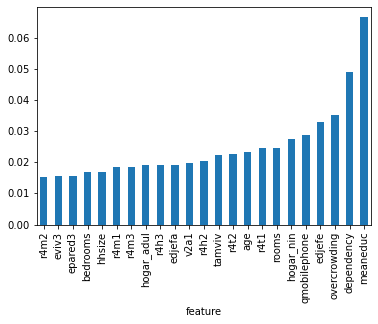

In [88]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot.bar()


### The End

#### with the help of:
#### https://jhimlib.github.io/IncomeQualification/
#### https://github.com/JogeshDhiman/Income-Qualification-Project/blob/master/Income%20Qualification.ipynb